In [2]:
import pandas as pd
import numpy as np
import missingno as msno

In [3]:
filepath = '/Users/efkanturedi/Corteze/untitled folder/en.openfoodfacts.org.products.csv'
used_features = ['product_name','brands','code','pnns_groups_1','nutriscore_grade','energy-kcal_100g','proteins_100g','carbohydrates_100g','sugars_100g','fat_100g','saturated-fat_100g','fiber_100g','salt_100g','nutrition-score-fr_100g']
data = pd.read_csv(filepath, sep='\t',usecols=used_features)

/Users/efkanturedi/opt/anaconda3/envs/py37/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
data.shape

(2059358, 14)

In [5]:
#data = data.sample(n=10000,random_state=42)

In [6]:
data = data.reset_index(drop = True)

In [7]:
data.columns[120:150]

Index([], dtype='object')

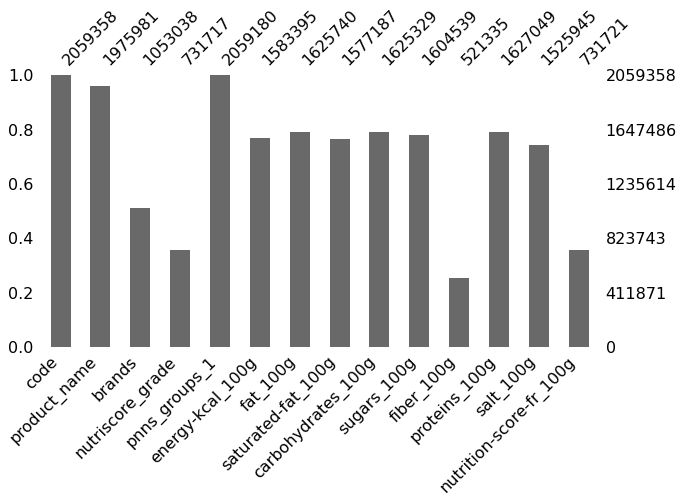

In [8]:
msno.bar(data, figsize=(10,5));

<h2> Let's first clean some obvious outliers
   

In [9]:
non_negative_capped_data = ['fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']
numeric_data = ['energy-kcal_100g','fat_100g','saturated-fat_100g','carbohydrates_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g','nutrition-score-fr_100g']

In [10]:
data

,code,product_name,brands,nutriscore_grade,pnns_groups_1,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,00000000000000225,jeunes pousses,endives,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,00000000000003429145,L.casei,NaN,NaN,unknown,NaN,1.4,0.90,9.8,9.8,NaN,2.7,0.10,NaN
2,0000000000017,Vitória crackers,NaN,NaN,unknown,375.0,7.0,3.08,70.1,15.0,NaN,7.8,1.40,NaN
3,0000000000031,Cacao,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,000000000003327986,Filetes de pollo empanado,NaN,NaN,unknown,163.9,1.9,1.00,NaN,NaN,NaN,15.3,1.10,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2059353,9999999910128,Sandwich club Rillette poisson combava,NaN,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059354,999999999,Thé noir BIO Darjeeling,Pagès,NaN,unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2059355,9999999990397,Fati,NaN,NaN,unknown,24.0,0.3,0.00,2.4,0.6,NaN,1.6,0.64,NaN
2059356,9999999999994,Light & Free SKYR A BOIRE,NaN,NaN,unknown,0.0,0.2,0.10,8.0,7.8,NaN,5.5,0.15,NaN


In [11]:
data = data.dropna(how='any',subset=numeric_data)
data = data.reset_index(drop=True)
data

,code,product_name,brands,nutriscore_grade,pnns_groups_1,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000001281,Tarte noix de coco,"Crous Resto',Crous",d,Sugary snacks,381.0,22.00,15.5,27.30,21.90,4.4,4.60,0.1000,14.0
1,0000000001885,Compote de poire,Crous,a,Fruits and vegetables,157.0,0.00,0.0,36.00,27.00,3.6,0.60,0.0000,-2.0
2,0000000005470,BAguette bressan,Crousresto',a,Cereals and potatoes,160.0,2.20,0.5,25.20,0.60,1.6,9.50,0.3580,-4.0
3,0000000043595,Cranberries,Torn & Glasser,c,Fruits and vegetables,300.0,0.00,0.0,83.33,66.67,10.0,0.00,0.0000,3.0
4,0000000290616,Salade Cesar,Kirkland Signature,c,Fruits and vegetables,290.0,12.00,7.0,23.00,0.00,2.0,22.00,2.1600,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374513,9948240886,Lemon raspberry italian sparkling mineral water,"Whole foods, Whole Foods Market",b,Beverages,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0250,0.0
374514,99482467111,"Almondmilk beverage, chocolate",NaN,b,Beverages,38.0,1.05,0.0,6.33,5.91,0.4,0.42,0.1575,1.0
374515,9950014911001,Oignons jaunes 40/60,Ferme De L'artois,a,Fruits and vegetables,0.0,5.00,5.0,2.00,0.50,25.0,32.00,0.2000,-11.0
374516,9999091865142,Paprikás Kukorica csemege,Spar,d,unknown,496.0,24.00,1.9,61.00,1.50,0.0,6.90,0.9600,11.0


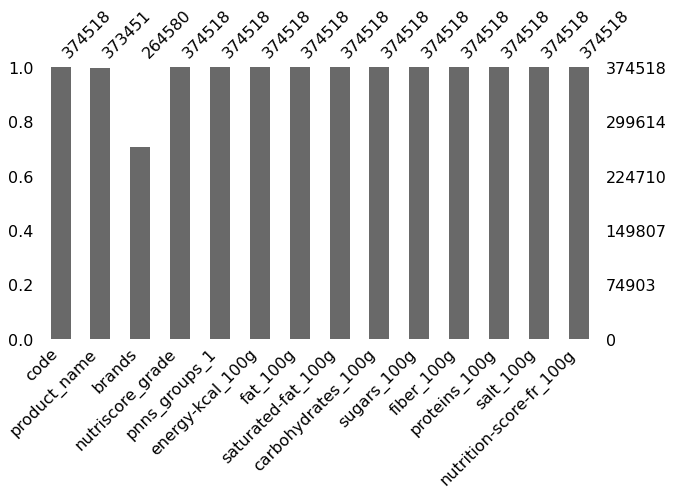

In [13]:
msno.bar(data, figsize=(10,5));

In [14]:
min_capper = lambda x : 0 if x < 0 else x

def max_capper_func(df,column,max_value,med):
    df[column] = df[column].apply(lambda x : x if x < max_value else med)
    return df[column]

In [15]:
for col in non_negative_capped_data:
    data[col] = data[col].apply(min_capper)
    med = np.nanmedian(data[col])
    data[col] = max_capper_func(data,col,100,med)
med = np.nanmedian(data['energy-kcal_100g'])
data['energy-kcal_100g'] = max_capper_func(data,'energy-kcal_100g',1000,med)

In [16]:
data

,code,product_name,brands,nutriscore_grade,pnns_groups_1,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
0,0000000001281,Tarte noix de coco,"Crous Resto',Crous",d,Sugary snacks,381.0,22.00,15.5,27.30,21.90,4.4,4.60,0.1000,14.0
1,0000000001885,Compote de poire,Crous,a,Fruits and vegetables,157.0,0.00,0.0,36.00,27.00,3.6,0.60,0.0000,-2.0
2,0000000005470,BAguette bressan,Crousresto',a,Cereals and potatoes,160.0,2.20,0.5,25.20,0.60,1.6,9.50,0.3580,-4.0
3,0000000043595,Cranberries,Torn & Glasser,c,Fruits and vegetables,300.0,0.00,0.0,83.33,66.67,10.0,0.00,0.0000,3.0
4,0000000290616,Salade Cesar,Kirkland Signature,c,Fruits and vegetables,290.0,12.00,7.0,23.00,0.00,2.0,22.00,2.1600,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
374513,9948240886,Lemon raspberry italian sparkling mineral water,"Whole foods, Whole Foods Market",b,Beverages,0.0,0.00,0.0,0.00,0.00,0.0,0.00,0.0250,0.0
374514,99482467111,"Almondmilk beverage, chocolate",NaN,b,Beverages,38.0,1.05,0.0,6.33,5.91,0.4,0.42,0.1575,1.0
374515,9950014911001,Oignons jaunes 40/60,Ferme De L'artois,a,Fruits and vegetables,0.0,5.00,5.0,2.00,0.50,25.0,32.00,0.2000,-11.0
374516,9999091865142,Paprikás Kukorica csemege,Spar,d,unknown,496.0,24.00,1.9,61.00,1.50,0.0,6.90,0.9600,11.0


In [17]:
data.describe()

,energy-kcal_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,nutrition-score-fr_100g
count,374518.000000,374518.000000,374518.000000,374518.000000,374518.000000,374518.000000,374518.000000,374518.000000,374518.000000
mean,281.562572,12.931797,4.628068,32.517325,13.757942,2.919041,7.953557,1.078502,8.147040
std,183.507797,15.497878,7.163779,27.204578,18.097288,4.513412,8.336093,3.286765,9.075683
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-15.000000
25%,108.000000,1.000000,0.000000,7.140000,1.300000,0.000000,2.100000,0.100000,0.000000
50%,283.000000,7.100000,1.700000,24.710000,4.800000,1.600000,6.000000,0.600000,8.000000
75%,413.000000,20.900000,6.670000,57.140000,21.280000,3.600000,11.000000,1.250000,15.000000
max,999.000000,99.970000,99.900000,99.950000,99.950000,99.000000,99.000000,99.905800,40.000000


In [16]:
#temp_data = data.sample(n=10000,random_state = 42).reset_index(drop=True)
#temp_data

In [18]:
final_path = '/Users/efkanturedi/Corteze/untitled folder/nutri_clean_prod.csv'

In [19]:
data.to_csv(final_path, index=False)